In [15]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import os, sys
import re
import uproot
import pickle
import vector
import mplhep as hep
import math
vector.register_awkward()

# parameters for matplotlib styling
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams.update({'font.size': 20})

In [16]:
# parameters
tag = '2018_MC'
unblind = False                               # don't show D_obs for SUEP

# set to 'all' or list of plots or plot name
show = ['SUEP_mult_nconst', 'ABCDvars_2D_mult']                        
# set to 'all' or list of plots or plot name
save_to_file = 'all'                    
output_label = 'SUEP'

datasets = [
           "QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM",
           "SUEP-m1000-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m1000-darkPhoHad+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m1000-generic+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m125-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m125-darkPhoHad+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m125-generic+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m400-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m400-darkPhoHad+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m400-generic+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m750-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m750-darkPhoHad+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m750-generic+RunIIAutumn18-private+MINIAODSIM"
           ]
plotDir = os.environ['HOME']+"/SUEPCoffea_dask/plotting/"
infile_names = [plotDir+dataset+'_ABCD_plot.pkl' for dataset in datasets]
dataDir = "/work/submit/{0}/SUEP/{1}".format(os.environ['USER'],tag)

In [17]:
# function to load files from pickle
def openpkl(infile_name):
    with (open(infile_name, "rb")) as openfile:
        plots = pickle.load(openfile)
        plots.update(pickle.load(openfile))
    return plots

def plot1d(h, ax, label):
    values, x = h.to_numpy()
    if 'QCD' in label: 
        ax.step(x[:-1],values, label=label, color='midnightblue', lw=3)
        #ax.fill_between(x[:-1],values,step='pre', color='midnightblue')
    else:
        ax.step(x[:-1],values, label=label)
    ax.set_xlabel(h.axes[0].label)
    ax.set_ylabel("Events")
    
def plot2d(h, ax, log=False):
    w, x, y = h.to_numpy()
    if log: mesh = ax.pcolormesh(x, y, w.T, cmap="RdYlBu", norm=matplotlib.colors.LogNorm())
    else: mesh = ax.pcolormesh(x, y, w.T, cmap="RdYlBu")
    ax.set_xlabel(h.axes[0].label)
    ax.set_ylabel(h.axes[1].label)
    fig.colorbar(mesh)
    
def find_nth(string, substring, n):
    if (n == 1):
        return string.find(substring)
    else:
        return string.find(substring, find_nth(string, substring, n - 1) + 1)

In [18]:
# load files
SUEP_plots, QCD_plots = {}, {}
for dataset, infile_name in zip(datasets, infile_names):
    if not os.path.isfile(infile_name): 
        print("WARNING:",dataset,"doesn't exist")
        continue
    print("Loading",dataset)
    if 'SUEP' in dataset:
        SUEP_plots[dataset] = openpkl(infile_name)
    if 'QCD' in dataset:
        QCD_plots[dataset] = openpkl(infile_name)

Loading QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8+RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1+MINIAODSIM
Loading SU

In [19]:
# define a list of plots to show
if type(show) == str and show == 'all': 
    showlist = list(SUEP_plots[list(SUEP_plots.keys())[0]].keys())
elif type(show) == str and show in SUEP_plots[list(SUEP_plots.keys())[0]].keys():
    showlist = [show]
elif type(show) == list: 
    showlist = show
print("Showing plots:",showlist)

# define a savelist of plots to save to file
if type(save_to_file) == str and save_to_file == 'all': 
    savelist = list(SUEP_plots[list(SUEP_plots.keys())[0]].keys())
elif type(save_to_file) == str and save_to_file in SUEP_plots[list(SUEP_plots.keys())[0]].keys():
    savelist = [save_to_file]
elif type(save_to_file) == list: 
    savelist = save_to_file
print("Saving plots:",savelist)

Showing plots: ['SUEP_mult_nconst', 'ABCDvars_2D_mult']
Saving plots: ['SUEP_mult_nconst', 'SUEP_mult_pt', 'SUEP_mult_pt_avg', 'SUEP_mult_pt_avg_b', 'SUEP_mult_eta', 'SUEP_mult_phi', 'SUEP_mult_mass', 'SUEP_mult_spher', 'SUEP_mult_aplan', 'SUEP_mult_FW2M', 'SUEP_mult_D', 'SUEP_mult_girth_pt', 'SUEP_mult_rho0', 'SUEP_mult_rho1', 'A_mult', 'B_mult', 'C_mult', 'D_exp_mult', 'D_obs_mult', 'ABCDvars_2D_mult', '2D_girth_nconst_mult', '2D_rho0_nconst_mult', '2D_rho1_nconst_mult', 'SUEP_ch_nconst', 'SUEP_ch_pt', 'SUEP_ch_pt_avg', 'SUEP_ch_pt_avg_b', 'SUEP_ch_eta', 'SUEP_ch_phi', 'SUEP_ch_mass', 'SUEP_ch_spher', 'SUEP_ch_aplan', 'SUEP_ch_FW2M', 'SUEP_ch_D', 'SUEP_ch_girth_pt', 'SUEP_ch_rho0', 'SUEP_ch_rho1', 'A_ch', 'B_ch', 'C_ch', 'D_exp_ch', 'D_obs_ch', 'ABCDvars_2D_ch', '2D_girth_nconst_ch', '2D_rho0_nconst_ch', '2D_rho1_nconst_ch', 'SUEP_ch_dphi_chcands_ISR', 'SUEP_ch_dphi_SUEPtracks_ISR', 'SUEP_ch_dphi_ISRtracks_ISR', 'SUEP_ch_dphi_SUEP_ISR']


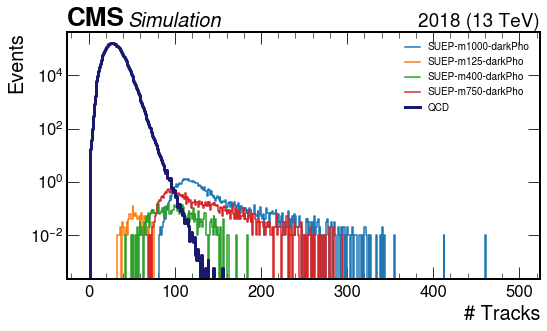

In [20]:
#### 1D PLOTS

# only plot certain SUEP samples
darkPho = True
darkPhoHad = False
generic = False

SUEP_samples_toplot = []
for dataset in datasets:
    if darkPho and ('darkPho+' in dataset): SUEP_samples_toplot.append(dataset)
    if darkPhoHad and ('darkPhoHad+' in dataset): SUEP_samples_toplot.append(dataset)
    if generic and ('generic+' in dataset): SUEP_samples_toplot.append(dataset)

for plot_label in showlist:
    #if 'D_obs' in plot_label and (not unblind): continue
    if '2D' in plot_label: continue
    save = plot_label in savelist
        
    # define figure, axis on which to plot QCD and SUEP
    fig, ax = plt.subplots(figsize=(8,5))
    hep.cms.label(data=False,year='2018', fontsize=20)
    
    # keep the SUEP hists separate for each sample
    SUEP_hists,SUEP_labels = [],[]
    for sample in list(SUEP_samples_toplot):
        i = find_nth(sample,'+',1)
        SUEP_labels.append(sample[:i])
        SUEP_hists.append(SUEP_plots[sample][plot_label])
    
    # combine the QCD hists
    for i,QCD_sample in enumerate(QCD_plots.keys()):
        if i==0: hQCD = QCD_plots[QCD_sample][plot_label]
        else: hQCD = hQCD + QCD_plots[QCD_sample][plot_label]
    
    # plot QCD, SUEP
    for hSUEP, l in zip(SUEP_hists, SUEP_labels): plot1d(hSUEP, ax, l)
    plot1d(hQCD, ax, 'QCD')
    
    ax.set_yscale('log')
    ax.legend(loc='best', fontsize=10, framealpha=1, facecolor='white', shadow=True)
    fig.tight_layout()
    fig.show()
    
    if save: fig.savefig(output_label + "_" + plot_label +".png", bbox_inches='tight')

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.07500000000000001, 0.085, 0.095, 0.105, 0.115, 0.125, 0.135, 0.14500000000000002, 0.15500000000000003, 0.16499999999999998, 0.175, 0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.28500000000000003, 0.29500000000000004, 0.305, 0.315, 0.325, 0.33499999999999996, 0.345, 0.355, 0.365, 0.375, 0.385, 0.39499999999999996, 0.40499999999999997, 0.415, 0.425, 0.435, 0.445, 0.455, 0.46499999999999997, 0.475, 0.485, 0.495, 0.505, 

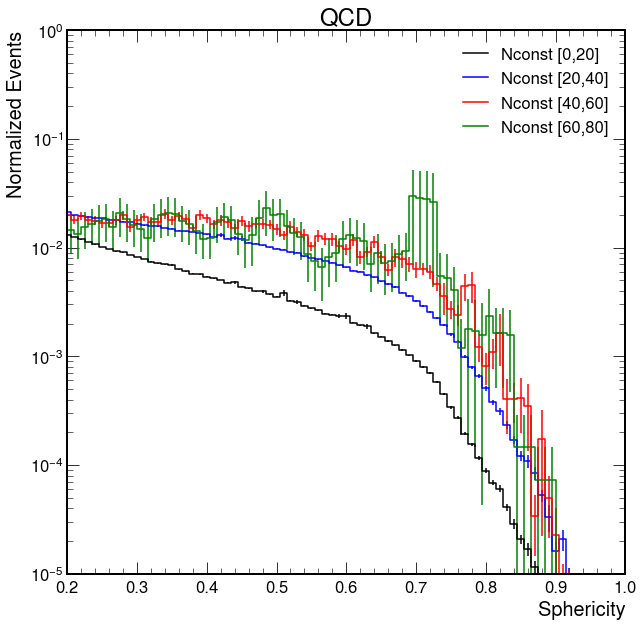

In [181]:
### 1D slices of a 2D plot for QCD

plot_label = 'ABCDvars_2D_ch'
for i,QCD_sample in enumerate(QCD_plots.keys()):
        if i==0: h = QCD_plots[QCD_sample][plot_label]
        else: h = h + QCD_plots[QCD_sample][plot_label]

w, x, y =h.to_numpy()
errs = h.variances()
x=x[:-1]
y=y[:-1]

colors = ['black','blue','red','green','magenta']
for i in range(4):
    values = np.sum(w[:,(y>20*i) & (y<=20*(i+1))],axis=1)
    norm = np.sum(values) 
    values = values / norm
    e = np.sqrt(np.sum(errs[:,(y>20*i) & (y<=20*(i+1))],axis=1))/norm
    
    if i == 3:
        old_values = values
        values = []
        new_x = []
        new_e = []
        for j in range(round(len(old_values)-1)):
            values.append(np.sum(old_values[j:j+4])/4)
            new_x.append(np.sum(x[j:j+4])/4)
            new_e.append(np.sum(e[j:j+4])/4)
        print(x)
        print(new_x)
        plt.errorbar(new_x, values, new_e, linestyle='', color=colors[i])
        plt.step(new_x, values, label="Nconst [{0},{1}]".format(round(i*20,1), round(20*(i+1),1)), where='mid', color=colors[i])
   
    else:
        plt.errorbar(x, values, e, linestyle='', color=colors[i])
        plt.step(x, values, label="Nconst [{0},{1}]".format(round(i*20,1), round(20*(i+1),1)), where='mid', color=colors[i])
plt.legend()
plt.title("QCD")
plt.xlim(0.2,1.0)
plt.ylim(1e-5,1)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel("Sphericity")
plt.savefig("nconst_spher_1dslices_ch.png")

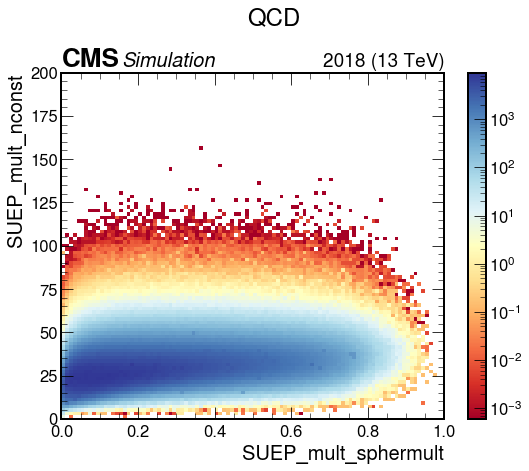

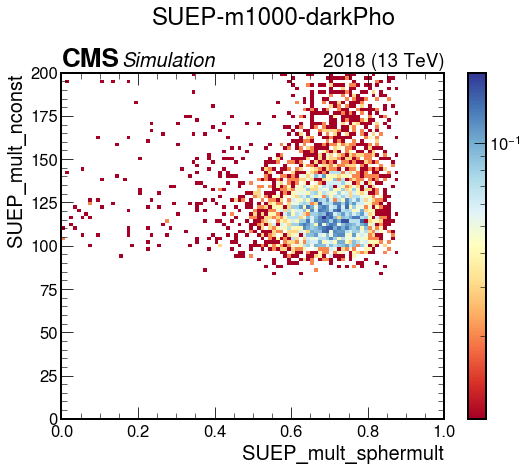

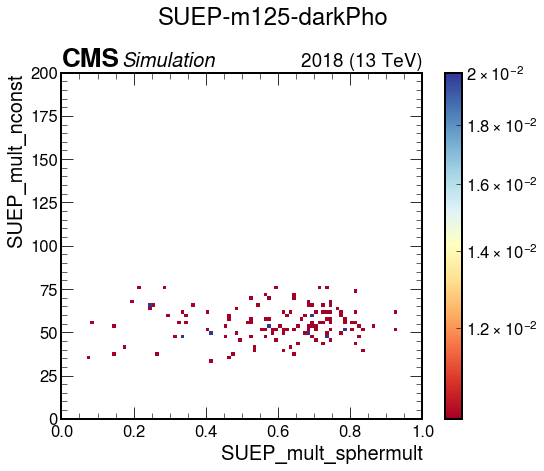

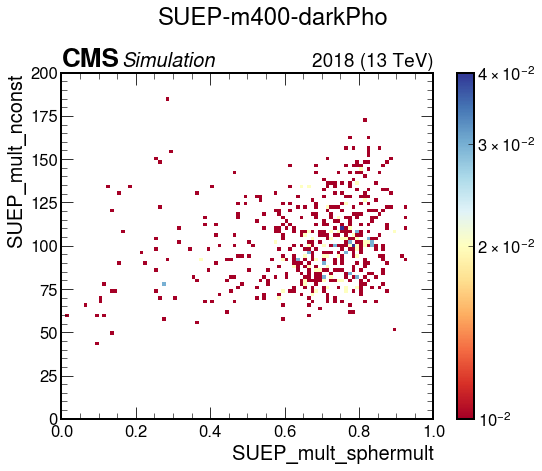

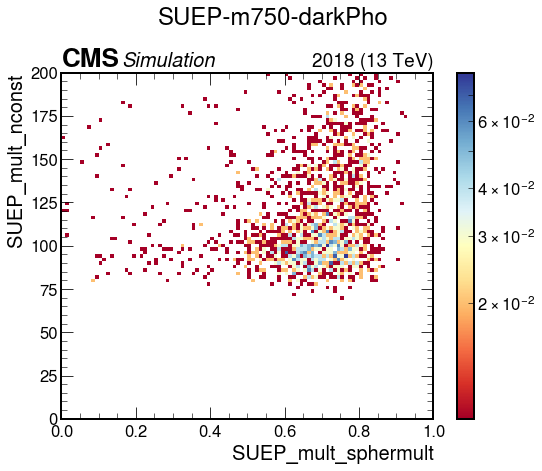

In [21]:
### 2D PLOTS
datasets2d = ['QCD',
            "SUEP-m1000-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m125-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m400-darkPho+RunIIAutumn18-private+MINIAODSIM",
           "SUEP-m750-darkPho+RunIIAutumn18-private+MINIAODSIM"]

for dataset in datasets2d:
    for plot_label in showlist:
        if 'D_obs' in plot_label and (not unblind): continue
        if '2D' not in plot_label: continue
                
        save = plot_label in savelist

        # define figure, axis on which to plot QCD and SUEP
        fig, ax = plt.subplots(figsize=(8,7))
        hep.cms.label(data=False,year='2018', fontsize=20)

        if 'SUEP' in dataset: h = SUEP_plots[dataset][plot_label]
        elif 'QCD' in dataset and 'QCD' != dataset: h = QCD_plots[dataset][plot_label]
        elif 'QCD' == dataset: 
            for i,QCD_sample in enumerate(QCD_plots.keys()):
                if i==0: 
                    h = QCD_plots[QCD_sample][plot_label]
                else: 
                    h = h + QCD_plots[QCD_sample][plot_label]
        if '+' in dataset:
            i = find_nth(dataset,'+',1)
            l = dataset[:i]
        else: l = dataset
        plot2d(h, ax, log=True)

        fig.suptitle(l, y=0.95)
        fig.tight_layout()
        fig.show()

        if save: fig.savefig(l + "_" + plot_label +".png", bbox_inches='tight')

/tmp/ipykernel_1444040/962450936.py:63: RuntimeWarning: invalid value encountered in true_divide
  yerrors = [Dobs/Dexp - (Dobs-hQCD_Dobs_errs)/(Dexp+hQCD_Dexp_errs),(Dobs+hQCD_Dobs_errs)/(Dexp-hQCD_Dexp_errs) - Dobs/Dexp]
/tmp/ipykernel_1444040/962450936.py:65: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x[:-1],np.where(Dobs>0,Dobs/Dexp,1),yerr=yerrors, color="black", fmt='o')


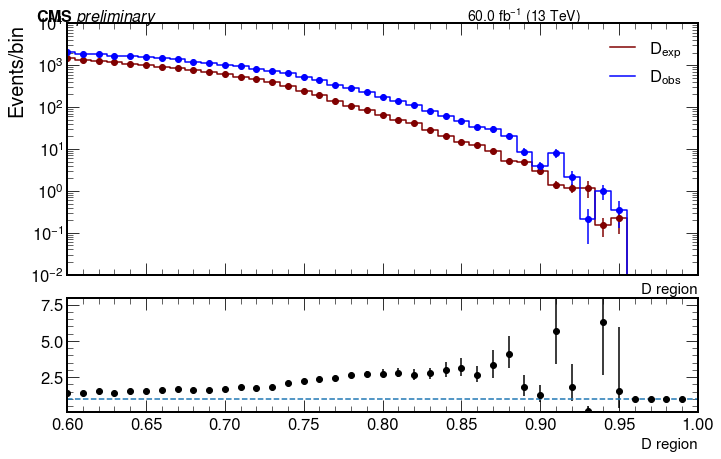

In [179]:
### Make D closure plot based on selection (e.g. 'ch', 'mult')
selection = 'ch'

# combine the QCD hists
for i,QCD_sample in enumerate(QCD_plots.keys()):
    if i==0: 
        hQCD_Dexp = QCD_plots[QCD_sample]['D_exp_'+selection]
        hQCD_Dexp_errs = QCD_plots[QCD_sample]['D_exp_'+selection].variances()
        hQCD_Dobs = QCD_plots[QCD_sample]['D_obs_'+selection]
        hQCD_Dobs_errs = QCD_plots[QCD_sample]['D_obs_'+selection].variances()
    else: 
        hQCD_Dexp = hQCD_Dexp + QCD_plots[QCD_sample]['D_exp_'+selection]
        hQCD_Dexp_errs = hQCD_Dexp_errs + QCD_plots[QCD_sample]['D_exp_'+selection].variances()
        hQCD_Dobs = hQCD_Dobs + QCD_plots[QCD_sample]['D_obs_'+selection]
        hQCD_Dobs_errs = hQCD_Dobs_errs + QCD_plots[QCD_sample]['D_obs_'+selection].variances()
        
hQCD_Dobs_errs = np.sqrt(hQCD_Dobs_errs)
hQCD_Dexp_errs = np.sqrt(hQCD_Dexp_errs)

#Set up variables for the stacked histogram
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

Dexp, x = hQCD_Dexp.to_numpy()
ax1.step(x[:-1],Dexp, color='maroon',label=r"$D_{exp}$", where='mid')
ax1.errorbar(x[:-1],Dexp, yerr=hQCD_Dexp_errs, color="maroon".upper(), fmt='o')

Dobs, x = hQCD_Dobs.to_numpy()
ax1.step(x[:-1],Dobs, color='blue',label=r"$D_{obs}$", where= 'mid')
ax1.errorbar(x[:-1],Dobs, yerr=hQCD_Dobs_errs, color="blue".upper(), fmt='o')

xmin = 0.6
ax1.set_yscale("log")
ax1.set_ylim([0.01, 10000])
ax1.set_xlim([xmin,1.0])
    
#Set parameters that will be used to make the plots prettier
#max_y = ax1.gca().get_ylim()[1]
max_y = 10000
max_x = max(x[:-1])
min_x = xmin
x_range = max_x - min_x
lower_label = min_x - x_range*0.05
upper_label = max_x - x_range*0.35
    
#X and Y labels (Do not use the central matplotlob default)
ax1.set_xlabel('D region', x=1, ha='right', fontsize=15)
ax1.set_ylabel("Events/bin", y=1, ha='right')
    
cms = ax1.text(
        lower_label, max_y*1.08, u"CMS $\it{preliminary}$",
        fontsize=16, fontweight='bold',
)

lumi = ax1.text(
        upper_label, max_y*1.08, r"%.1f fb$^{-1}$ (13 TeV)" % 60,
        fontsize=14, 
)
ax1.legend()

ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
yerrors = [Dobs/Dexp - (Dobs-hQCD_Dobs_errs)/(Dexp+hQCD_Dexp_errs),(Dobs+hQCD_Dobs_errs)/(Dexp-hQCD_Dexp_errs) - Dobs/Dexp]
#yerrors = [(QCD_obs-QCD_obs_errors)/(QCD_exp+QCD_exp_errors),(QCD_obs+QCD_obs_errors)/(QCD_exp-QCD_exp_errors)]
ax2.errorbar(x[:-1],np.where(Dobs>0,Dobs/Dexp,1),yerr=yerrors, color="black", fmt='o')
ax2.axhline(1, ls="--")
ax2.set_ylim(0.1,8)
ax2.set_xlabel("D region", fontsize=15)
plt.savefig("D_region_mult.pdf")

In [132]:
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
SUEPdata = nested_dict(3,float)
QCDdata = nested_dict(2,float)

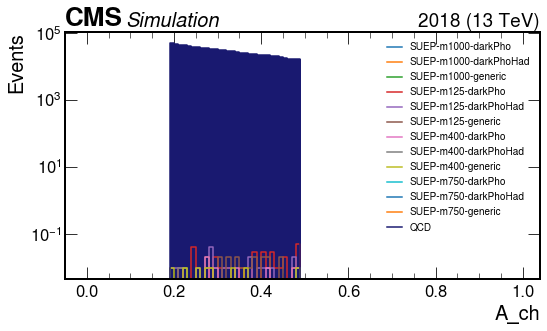

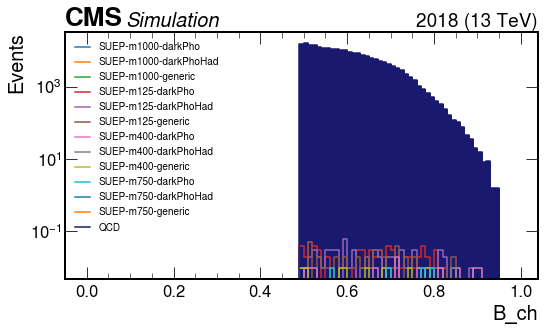

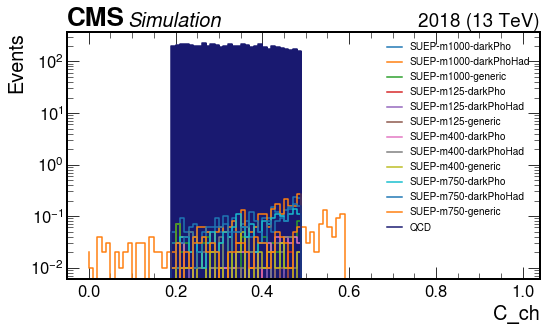

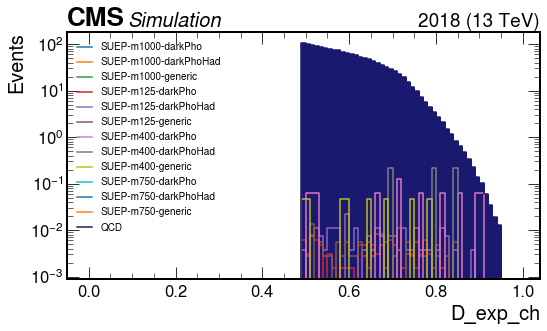

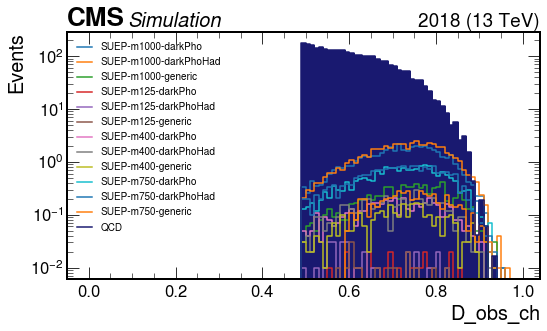

In [133]:
### Make ABCD plots and table based on selection (e.g. 'ch', 'mult')
selection = 'ch'

for plot_label in ['A_'+selection,'B_'+selection,'C_'+selection,'D_exp_'+selection,'D_obs_'+selection]:
    save = True
        
    # define figure, axis on which to plot QCD and SUEP
    fig, ax = plt.subplots(figsize=(8,5))
    hep.cms.label(data=False,year='2018', fontsize=20)
    
    # keep the SUEP hists separate for each sample
    SUEP_hists,SUEP_labels = [],[]
    for sample in list(SUEP_plots.keys()):
        i = find_nth(sample,'+',1)
        SUEP_labels.append(sample[:i])
        SUEP_hists.append(SUEP_plots[sample][plot_label])
        
        SUEPdata[sample[:i]][plot_label]["value"] = np.sum(SUEP_plots[sample][plot_label].values())
        SUEPdata[sample[:i]][plot_label]["err"] = np.sum(SUEP_plots[sample][plot_label].variances())
    
    # combine the QCD hists
    for i,QCD_sample in enumerate(QCD_plots.keys()):
        if i==0: hQCD = QCD_plots[QCD_sample][plot_label]
        else: hQCD = hQCD + QCD_plots[QCD_sample][plot_label]
    
    # plot QCD, SUEP
    for hSUEP, l in zip(SUEP_hists, SUEP_labels): plot1d(hSUEP, ax, l)
    plot1d(hQCD, ax, 'QCD')
    SUEPdata['QCD'][plot_label]["value"] = np.sum(hQCD.values())
    SUEPdata['QCD'][plot_label]["err"] = np.sum(hQCD.variances())
    
    ax.set_yscale('log')
    ax.legend(loc='best', fontsize=10, framealpha=1, facecolor='white', shadow=True)
    fig.tight_layout()
    fig.show()
    
    if save: fig.savefig(output_label + "_" + plot_label +".pdf", bbox_inches='tight')

In [134]:
table = []
for i in range(len(list(SUEPdata.keys()))):
    label = list(SUEPdata.keys())[i]
    line = []
    line.append(label)
    for r in ['A_'+selection,'B_'+selection,'C_'+selection,'D_exp_'+selection,'D_obs_'+selection]:
        line.append("{:0.2f} +/- {:0.2f}".format(SUEPdata[label][r]['value'],SUEPdata[label][r]['err']))
    if 'QCD' in label:
        line.append((SUEPdata[label]['D_exp_'+selection]['value']-SUEPdata[label]['D_obs_'+selection]['value'])/SUEPdata[label]['D_exp_'+selection]['value'])
        line.append(0)
    else:
        line.append(0)
        line.append(SUEPdata[label]['D_obs_'+selection]['value']/math.sqrt(SUEPdata[label]['D_obs_'+selection]['value']+SUEPdata[label]['D_exp_'+selection]['value']+SUEPdata[label]['D_obs_'+selection]['err']+SUEPdata['QCD']['D_exp_'+selection]['err']))
    table.append(line)                                                         

In [135]:
from tabulate import tabulate
t = tabulate(table,
               headers=['Process', 'A region', 'B region', 'C region', 'D expected', 'D observed', '(exp-obs)/exp', 'S/\u221A(S+B+\u03C3S+\u03C3B)'])
with open('table.txt', 'w') as f:
    f.write(t)
t

'Process                A region                  B region                  C region             D expected        D observed             (exp-obs)/exp    S/√(S+B+σS+σB)\n---------------------  ------------------------  ------------------------  -------------------  ----------------  -------------------  ---------------  ----------------\nSUEP-m1000-darkPho     0.00 +/- 0.00             0.00 +/- 0.00             2.46 +/- 0.02        0.00 +/- 0.00     46.26 +/- 0.46              0                6.58616\nSUEP-m1000-darkPhoHad  0.00 +/- 0.00             0.00 +/- 0.00             2.57 +/- 0.03        0.00 +/- 0.00     53.85 +/- 0.54              0                7.13202\nSUEP-m1000-generic     0.02 +/- 0.00             0.00 +/- 0.00             0.79 +/- 0.01        0.00 +/- 0.00     8.44 +/- 0.08               0                2.52952\nSUEP-m125-darkPho      0.32 +/- 0.00             0.66 +/- 0.01             0.05 +/- 0.00        0.10 +/- 0.00     0.22 +/- 0.00               0            